<a href="https://colab.research.google.com/github/Rohiniv17/FORE/blob/main/simpleNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 21st October, 2022
# fashion_mnist dataset
# https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [23]:
# 1.0
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [11]:
# 2.0 Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [12]:
# 2.1 Read FASHION-MNIST data

path = "/gdrive/MyDrive/Deeplearning/fashion_mnist_train.csv"


In [13]:
# 2.2
data = pd.read_csv(path)

In [ ]:
# 2.2.1
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# 2.2.2
data.shape

(60000, 785)

In [15]:
# 2.3 Pop out target
y = data.pop('label')

In [16]:
# 2.3.1
data.shape

(60000, 784)

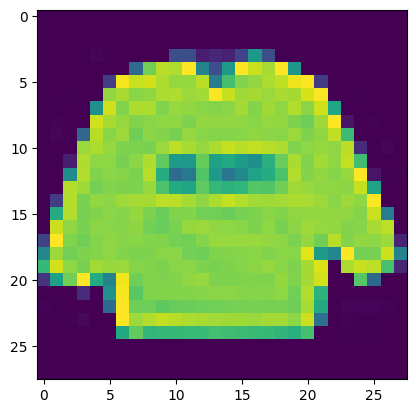

In [17]:
# 3.0
plt.imshow(data.iloc[0,:].values.reshape(28,28));

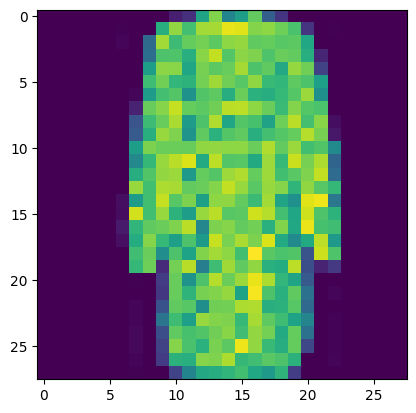

In [18]:
plt.imshow(data.iloc[200,:].values.reshape(28,28));

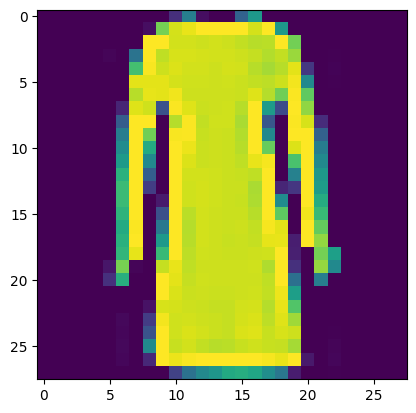

In [19]:
plt.imshow(data.iloc[17,:].values.reshape(28,28));

In [22]:
y.unique()
y.value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [24]:

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.25)

In [25]:
X_test.shape; X_train.shape; X_test.shape[0]/(X_test.shape[0]+X_train.shape[0])

0.25

In [26]:
ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [27]:
X_train.shape

(45000, 784)

In [28]:
np.round(X_train[:10],1)

array([[-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       ...,
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ]])

In [38]:
model = tf.keras.Sequential()

In [39]:
model.add (tf.keras.layers.Input((784,)))

In [40]:
model.add(tf.keras.layers.Dense(512, 'relu'))

In [41]:

model.add(tf.keras.layers.Dense(256, 'relu'))

In [42]:
model.add(tf.keras.layers.Dense(10,'softmax'))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile( loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 400)

Epoch 1/400


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 [==============================] - 15s 10ms/step - loss: 0.5054 - accuracy: 0.8237
Epoch 2/400
1407/1407 [==============================] - 13s 9ms/step - loss: 0.4111 - accuracy: 0.8620
Epoch 3/400
1407/1407 [==============================] - 12s 9ms/step - loss: 0.3883 - accuracy: 0.8745
Epoch 4/400
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3863 - accuracy: 0.8810
Epoch 5/400
1407/1407 [==============================] - 13s 10ms/step - loss: 0.3737 - accuracy: 0.8862
Epoch 6/400
1407/1407 [==============================] - 15s 11ms/step - loss: 0.3821 - accuracy: 0.8902
Epoch 7/400
1407/1407 [==============================] - 14s 10ms/step - loss: 0.3655 - accuracy: 0.8955
Epoch 8/400
1407/1407 [==============================] - 14s 10ms/step - loss: 0.3706 - accuracy: 0.8992
Epoch 9/400
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3685 - accuracy: 0.9024
Epoch 10/400
1407/1407 [==============================] - 13s 9ms/step 

In [ ]:
# 3.1
data[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 4.0
ss = StandardScaler()
ss.fit(data)
df = ss.transform(data)

In [ ]:
# 4.1
df.shape

(60000, 784)

In [ ]:
# 4.2
np.round(df[:10],1)

array([[-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       ...,
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ]])

## Model

In [ ]:
# 5.0
model = tf.keras.Sequential()

In [ ]:
# 5.1
model.add( tf.keras.layers.Input(shape = [784] ))

In [ ]:
# 5.2
model.add(tf.keras.layers.Dense(20, activation = 'relu'))

In [ ]:
# 5.3
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
# 5.4 Model summary:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 5.5 Compile model
model.compile(
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ["accuracy"]
              )

In [ ]:
# 6.0
model.fit(df,y, epochs = 50)

In [ ]:
# 6.1
model.evaluate(df,y)

1875/1875 [==============================] - 2s 939us/step - loss: 0.2720 - accuracy: 0.9168


[0.2719540297985077, 0.9168333411216736]

In [ ]:
######################### I am done #################